In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
print("1. DATA LOADING AND PREPROCESSING")
df = pd.read_csv("student.csv")

print("\nBasic Information about the Dataset:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nData types of each column:")
print(df.dtypes)


1. DATA LOADING AND PREPROCESSING

Basic Information about the Dataset:
Number of rows: 145
Number of columns: 11

First 5 rows of the dataset:
   Unnamed: 0      Id  Student_Age  Gender High_School_Type Scholarship  \
0           0  5001.0         21.0    Male            Other         50%   
1           1  5002.0         20.0    Male            Other         50%   
2           2  5003.0         21.0    Male            State         50%   
3           3  5004.0         18.0  Female          Private         50%   
4           4  5005.0         22.0    Male          Private         50%   

  Additional_Work Transportation  Weekly_Study_Hours Project_work Grade  
0             Yes        Private                 0.0           No    AA  
1             Yes        Private                 0.0          Yes    AA  
2              No        Private                 2.0          Yes    AA  
3             Yes            Bus                 2.0           No    AA  
4              No            Bus   

In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0            0
Id                    1
Student_Age           1
Gender                0
High_School_Type      1
Scholarship           3
Additional_Work       1
Transportation        1
Weekly_Study_Hours    7
Project_work          7
Grade                 0
dtype: int64


In [ ]:
print("Handling missing values...")

df['Student_Age'] = df['Student_Age'].fillna(df['Student_Age'].median())

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['High_School_Type'] = df['High_School_Type'].fillna(df['High_School_Type'].mode()[0])

df['Scholarship'] = df['Scholarship'].fillna(df['Scholarship'].mode()[0])

df['Additional_Work'] = df['Additional_Work'].fillna(df['Additional_Work'].mode()[0])

df['Transportation'] = df['Transportation'].fillna(df['Transportation'].mode()[0])

df['Weekly_Study_Hours'] = df['Weekly_Study_Hours'].fillna(df['Weekly_Study_Hours'].median())

df['Project_work'] = df['Project_work'].fillna(df['Project_work'].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

Handling missing values...

Missing values after handling:
Unnamed: 0            0
Id                    1
Student_Age           0
Gender                0
High_School_Type      0
Scholarship           0
Additional_Work       0
Transportation        0
Weekly_Study_Hours    0
Project_work          0
Grade                 0
dtype: int64


In [ ]:
print("Preprocessing completed successfully.")
print("\nFinal dataset shape:", df.shape)

df.info()

Preprocessing completed successfully.

Final dataset shape: (145, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          145 non-null    int64  
 1   Id                  144 non-null    float64
 2   Student_Age         144 non-null    float64
 3   Gender              145 non-null    object 
 4   High_School_Type    144 non-null    object 
 5   Scholarship         142 non-null    object 
 6   Additional_Work     144 non-null    object 
 7   Transportation      144 non-null    object 
 8   Weekly_Study_Hours  138 non-null    float64
 9   Project_work        138 non-null    object 
 10  Grade               145 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.6+ KB


In [ ]:
print("2.STATISTICAL ANALYSIS")

print("\nCentral Tendencies:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nMean of numeric columns:")
print(df[numeric_cols].mean())
print("\nMedian of numeric columns:")
print(df[numeric_cols].median())
print("\nMode of numeric columns:")
print(df[numeric_cols].mode().iloc[0])

2.STATISTICAL ANALYSIS

Central Tendencies:

Mean of numeric columns:
Unnamed: 0              72.000000
Id                    5072.861111
Student_Age             19.682759
Weekly_Study_Hours       2.331034
dtype: float64

Median of numeric columns:
Unnamed: 0              72.0
Id                    5072.5
Student_Age             19.0
Weekly_Study_Hours       0.0
dtype: float64

Mode of numeric columns:
Unnamed: 0               0.0
Id                    5001.0
Student_Age             18.0
Weekly_Study_Hours       0.0
Name: 0, dtype: float64


In [ ]:
print("Dispersion Measures:")

numeric_cols = df.select_dtypes(include=['number']).columns

print("\nStandard Deviation of numeric columns:")
print(df[numeric_cols].std())

print("\nVariance of numeric columns:")
print(df[numeric_cols].var())

print("\nRange of numeric columns:")
print(df[numeric_cols].max() - df[numeric_cols].min())

Dispersion Measures:

Standard Deviation of numeric columns:
Unnamed: 0            42.001984
Id                    42.115162
Student_Age            1.992010
Weekly_Study_Hours     4.249273
dtype: float64

Variance of numeric columns:
Unnamed: 0            1764.166667
Id                    1773.686869
Student_Age              3.968103
Weekly_Study_Hours      18.056322
dtype: float64

Range of numeric columns:
Unnamed: 0            144.0
Id                    144.0
Student_Age             8.0
Weekly_Study_Hours     12.0
dtype: float64


In [ ]:
print("Summary Statistics:")
print(df.describe().T)

Summary Statistics:
                    count         mean        std     min      25%     50%  \
Unnamed: 0          145.0    72.000000  42.001984     0.0    36.00    72.0   
Id                  144.0  5072.861111  42.115162  5001.0  5036.75  5072.5   
Student_Age         144.0    19.687500   1.998142    18.0    18.00    19.0   
Weekly_Study_Hours  138.0     2.449275   4.322868     0.0     0.00     0.0   

                        75%     max  
Unnamed: 0           108.00   144.0  
Id                  5109.25  5145.0  
Student_Age           21.00    26.0  
Weekly_Study_Hours     2.00    12.0  


In [ ]:
print("Frequency Distribution of Categorical Variables:")
cat_cols = ['Gender', 'High_School_Type', 'Additional_Work', 'Transportation', 'Project_work', 'Grade']
for col in cat_cols:
    print(f"\nFrequency Distribution of {col}:")
    print(df[col].value_counts())
    print(f"\nPercentage Distribution of {col}:")
    print(df[col].value_counts(normalize=True) * 100)

Frequency Distribution of Categorical Variables:

Frequency Distribution of Gender:
Gender
Male      87
Female    58
Name: count, dtype: int64

Percentage Distribution of Gender:
Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

Frequency Distribution of High_School_Type:
High_School_Type
State      103
Private     25
Other       17
Name: count, dtype: int64

Percentage Distribution of High_School_Type:
High_School_Type
State      71.034483
Private    17.241379
Other      11.724138
Name: proportion, dtype: float64

Frequency Distribution of Additional_Work:
Additional_Work
No     96
Yes    49
Name: count, dtype: int64

Percentage Distribution of Additional_Work:
Additional_Work
No     66.206897
Yes    33.793103
Name: proportion, dtype: float64

Frequency Distribution of Transportation:
Transportation
Private    85
Bus        60
Name: count, dtype: int64

Percentage Distribution of Transportation:
Transportation
Private    58.62069
Bus        41.37931
Name: proporti

In [ ]:
df = pd.read_csv("student.csv")

df.columns = df.columns.str.strip()

# Convert Scholarship to numerical values
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float)

# Group by Gender
print("\nAnalysis by Gender:")
gender_group = df.groupby('Gender')
print(gender_group[['Student_Age', 'Scholarship', 'Weekly_Study_Hours']].agg(['mean', 'median', 'std']))

# Group by High School Type
print("\nAnalysis by High School Type:")
school_group = df.groupby('High_School_Type')
print(school_group[['Student_Age', 'Scholarship', 'Weekly_Study_Hours']].agg(['mean', 'median', 'std']))

# Group by Grade
print("\nAnalysis by Grade:")
grade_group = df.groupby('Grade')
print(grade_group[['Student_Age', 'Scholarship', 'Weekly_Study_Hours']].agg(['mean', 'median', 'std']))

# Correlation Analysis
print("\nCorrelation Analysis:")
grade_map = {'AA': 10, 'BA': 9, 'BB': 8, 'CB': 7, 'CC': 6, 'DC': 5, 'DD': 4, 'Fail': 0}
df['Grade_Numeric'] = df['Grade'].map(grade_map)
print(df[['Grade_Numeric', 'Scholarship', 'Weekly_Study_Hours']].corr())

correlation = df[numeric_cols.tolist() + ['Grade_Numeric']].corr()
print(correlation)


Analysis by Gender:
       Student_Age                  Scholarship                    \
              mean median       std        mean median        std   
Gender                                                              
Female   19.413793   18.5  1.787230   68.859649   75.0  19.640009   
Male     19.872093   19.0  2.118804   61.176471   50.0  18.300518   

       Weekly_Study_Hours                   
                     mean median       std  
Gender                                      
Female           2.745098    0.0  4.629657  
Male             2.275862    0.0  4.150342  

Analysis by High School Type:
                 Student_Age                  Scholarship                    \
                        mean median       std        mean median        std   
High_School_Type                                                              
Other              20.000000   20.0  1.658312   60.294118   50.0  17.807178   
Private            18.840000   18.0  1.951068   67.000000   7

In [ ]:
print("3. INTERQUARTILE RANGE (IQR) ANALYSIS")

def detect_outliers_iqr(df, column):
    temp_df = df.copy()
    temp_df[column] = pd.to_numeric(temp_df[column], errors='coerce')

    temp_col = temp_df[column].dropna() # Dropping NaN values for quartile calculation
    q1 = temp_col.quantile(0.25)
    q3 = temp_col.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = temp_df[(temp_df[column] < lower_bound) | (temp_df[column] > upper_bound)].copy()  # To Find outliers in the original dataframe

    return lower_bound, upper_bound, outliers

for col in ['Student_Age', 'Scholarship', 'Weekly_Study_Hours']:  # Checking for outliers in numeric columns
    print(f"\nIQR Analysis for {col}:")

    num_col = pd.to_numeric(df[col], errors='coerce')    # Convert to numeric for analysis

    lower, upper, outliers = detect_outliers_iqr(df, col)  #To Run IQR detection

    print(f"Q1 (25th percentile): {num_col.quantile(0.25)}")
    print(f"Q2 (Median): {num_col.quantile(0.5)}")
    print(f"Q3 (75th percentile): {num_col.quantile(0.75)}")
    print(f"IQR: {num_col.quantile(0.75) - num_col.quantile(0.25)}")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    print(f"Number of outliers: {len(outliers)}")

    if len(outliers) > 0:
        print("Sample outliers:")
        columns_to_show = [col, 'Id', 'Gender', 'Grade']
        print(outliers[columns_to_show].head(5))

3. INTERQUARTILE RANGE (IQR) ANALYSIS

IQR Analysis for Student_Age:
Q1 (25th percentile): 18.0
Q2 (Median): 19.0
Q3 (75th percentile): 21.0
IQR: 3.0
Lower bound: 13.5
Upper bound: 25.5
Number of outliers: 2
Sample outliers:
     Student_Age      Id  Gender Grade
14          26.0  5015.0    Male    BA
117         26.0  5118.0  Female    AA

IQR Analysis for Scholarship:
Q1 (25th percentile): 50.0
Q2 (Median): 50.0
Q3 (75th percentile): 75.0
IQR: 25.0
Lower bound: 12.5
Upper bound: 112.5
Number of outliers: 0

IQR Analysis for Weekly_Study_Hours:
Q1 (25th percentile): 0.0
Q2 (Median): 0.0
Q3 (75th percentile): 2.0
IQR: 2.0
Lower bound: -3.0
Upper bound: 5.0
Number of outliers: 25
Sample outliers:
    Weekly_Study_Hours      Id  Gender Grade
4                 12.0  5005.0    Male    AA
9                 12.0  5010.0  Female  Fail
10                12.0  5011.0  Female    BA
11                 8.0  5012.0  Female  Fail
14                12.0  5015.0    Male    BA


In [ ]:
print("4. SCALING")

features_to_scale = ['Student_Age', 'Scholarship', 'Weekly_Study_Hours']

df_scaling = df[features_to_scale].copy()

for col in features_to_scale:
    df_scaling[col] = pd.to_numeric(df_scaling[col].astype(str).str.replace('%', ''), errors='coerce')

for col in features_to_scale:
    df_scaling[col].fillna(df_scaling[col].mean(), inplace=True)


minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit_transform(df_scaling)
df[['Student_Age_MinMax', 'Scholarship_MinMax', 'Weekly_Study_Hours_MinMax']] = df_minmax


standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df_scaling)
df[['Student_Age_Standard', 'Scholarship_Standard', 'Weekly_Study_Hours_Standard']] = df_standard


normalizer = Normalizer()
df_normalized = normalizer.fit_transform(df_scaling)
df[['Student_Age_Normalize', 'Scholarship_Normalize', 'Weekly_Study_Hours_Normalize']] = df_normalized

print("\nMinMax Scaled Data:")
print(pd.DataFrame(df_minmax, columns=['Student_Age', 'Scholarship', 'Weekly_Study_Hours']).describe())

print("\nStandard Scaled Data:")
print(pd.DataFrame(df_standard, columns=['Student_Age', 'Scholarship', 'Weekly_Study_Hours']).describe())

print("\nNormalized Data:")
print(pd.DataFrame(df_normalized, columns=['Student_Age', 'Scholarship', 'Weekly_Study_Hours']).describe())

print("\nScaling complete. Scaled columns added to dataframe.")

4. SCALING

MinMax Scaled Data:
       Student_Age  Scholarship  Weekly_Study_Hours
count   145.000000   145.000000          145.000000
mean      0.210938     0.523474            0.204106
std       0.248899     0.252756            0.351374
min       0.000000     0.000000            0.000000
25%       0.000000     0.333333            0.000000
50%       0.125000     0.333333            0.000000
75%       0.375000     0.666667            0.166667
max       1.000000     1.000000            1.000000

Standard Scaled Data:
        Student_Age   Scholarship  Weekly_Study_Hours
count  1.450000e+02  1.450000e+02        1.450000e+02
mean  -2.450147e-17  4.655280e-16        2.450147e-17
std    1.003466e+00  1.003466e+00        1.003466e+00
min   -8.504201e-01 -2.078244e+00       -5.828937e-01
25%   -8.504201e-01 -7.548777e-01       -5.828937e-01
50%   -3.464674e-01 -7.548777e-01       -5.828937e-01
75%    6.614378e-01  5.684881e-01       -1.069213e-01
max    3.181201e+00  1.891854e+00        2.27

<ipython-input-14-851684143c61>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaling[col].fillna(df_scaling[col].mean(), inplace=True)


In [ ]:
print("5. CATEGORICAL DATA ENCODING")

print("\nLabel Encoding:")
label_encoder = LabelEncoder()
for col in cat_cols:
    df[f"{col}_Label"] = label_encoder.fit_transform(df[col])
    print(f"{col} Label Encoding mapping:")
    for i, category in enumerate(label_encoder.classes_):
        print(f"  {category} -> {i}")

print("\nOne-Hot Encoding:")
df_onehot = df.copy()
for col in cat_cols:
    dummies = pd.get_dummies(df_onehot[col], prefix=col)
    df_onehot = pd.concat([df_onehot.drop(col, axis=1), dummies], axis=1)

print(f"Shape after One-Hot Encoding: {df_onehot.shape}")
print("Sample of One-Hot Encoded data (first 5 columns):")
print(df_onehot.iloc[:5, :10])

5. CATEGORICAL DATA ENCODING

Label Encoding:
Gender Label Encoding mapping:
  Female -> 0
  Male -> 1
High_School_Type Label Encoding mapping:
  Other -> 0
  Private -> 1
  State -> 2
  nan -> 3
Additional_Work Label Encoding mapping:
  No -> 0
  Yes -> 1
  nan -> 2
Transportation Label Encoding mapping:
  Bus -> 0
  Private -> 1
  nan -> 2
Project_work Label Encoding mapping:
  No -> 0
  Yes -> 1
  nan -> 2
Grade Label Encoding mapping:
  AA -> 0
  BA -> 1
  BB -> 2
  CB -> 3
  CC -> 4
  DC -> 5
  DD -> 6
  Fail -> 7

One-Hot Encoding:
Shape after One-Hot Encoding: (145, 40)
Sample of One-Hot Encoded data (first 5 columns):
   Unnamed: 0      Id  Student_Age  Scholarship  Weekly_Study_Hours  \
0           0  5001.0         21.0         50.0                 0.0   
1           1  5002.0         20.0         50.0                 0.0   
2           2  5003.0         21.0         50.0                 2.0   
3           3  5004.0         18.0         50.0                 2.0   
4          

6. DATA VISUALIZATION


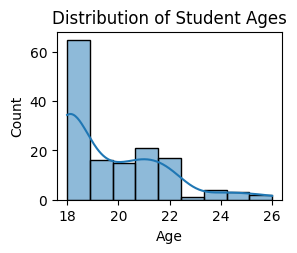

In [ ]:
print("6. DATA VISUALIZATION")

# 1. Distribution of Student Ages
plt.subplot(2, 2, 1)
sns.histplot(df['Student_Age'], kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

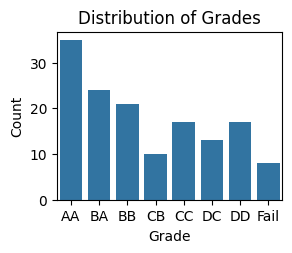

In [ ]:
# 2. Distribution of Grades
plt.subplot(2, 2, 2)
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']
grade_counts = df['Grade'].value_counts().reindex(grade_order)
sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.show()

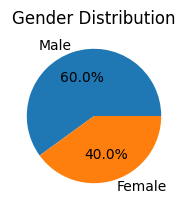

In [ ]:
# 3. Gender Distribution
plt.subplot(2, 2, 3)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

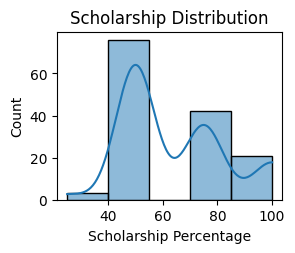

In [ ]:
# 4. Scholarship Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Scholarship'], bins=5, kde=True)
plt.title('Scholarship Distribution')
plt.xlabel('Scholarship Percentage')
plt.ylabel('Count')
plt.show()

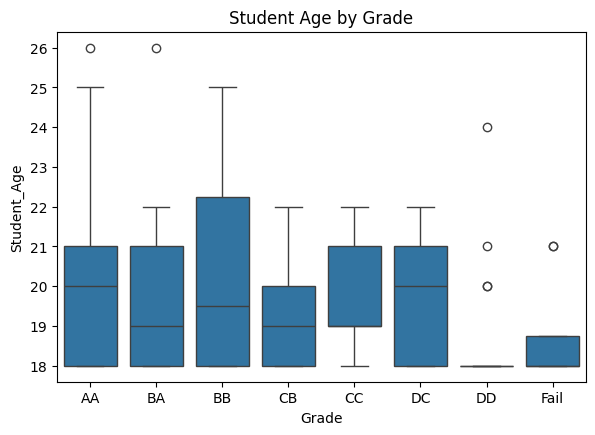

In [ ]:
# 5.Box plot for numeric variables by grade
plt.figure(figsize=(15, 10))
df = pd.read_csv("student.csv")
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']

plt.subplot(2, 2, 1)
sns.boxplot(x='Grade', y='Student_Age', data=df, order=grade_order)
plt.title('Student Age by Grade')

plt.show()

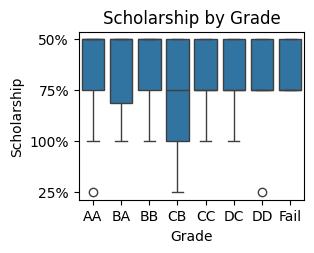

In [ ]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Grade', y='Scholarship', data=df, order=grade_order)
plt.title('Scholarship by Grade')

plt.show()

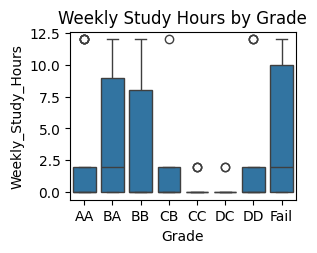

In [ ]:
plt.subplot(2, 2, 3)
sns.boxplot(x='Grade', y='Weekly_Study_Hours', data=df, order=grade_order)
plt.title('Weekly Study Hours by Grade')

plt.show()

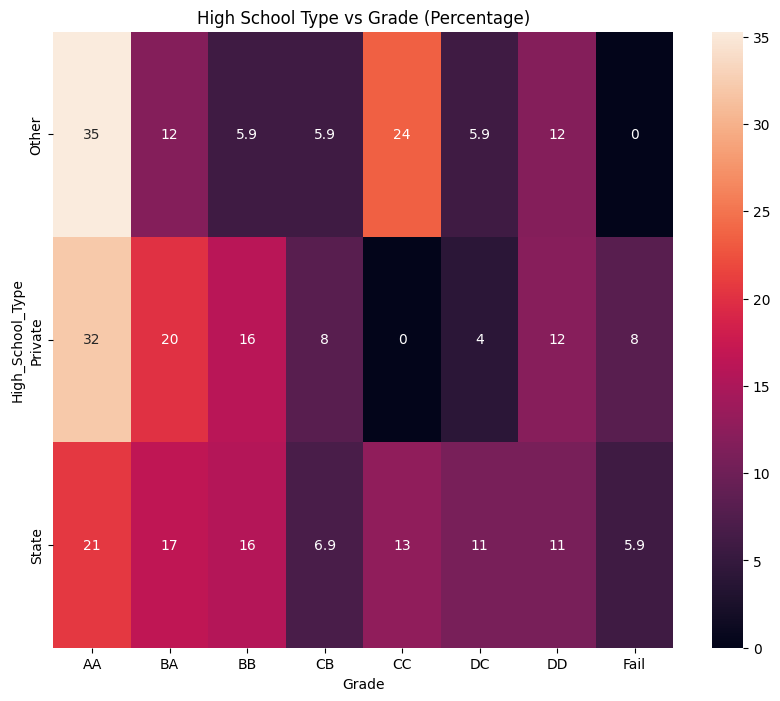

In [ ]:
# 6. High School Type vs Grade
plt.figure(figsize=(10, 8))
cross_tab = pd.crosstab(df['High_School_Type'], df['Grade'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

sns.heatmap(cross_tab_percentage, annot=True)
plt.title('High School Type vs Grade (Percentage)')
plt.show()

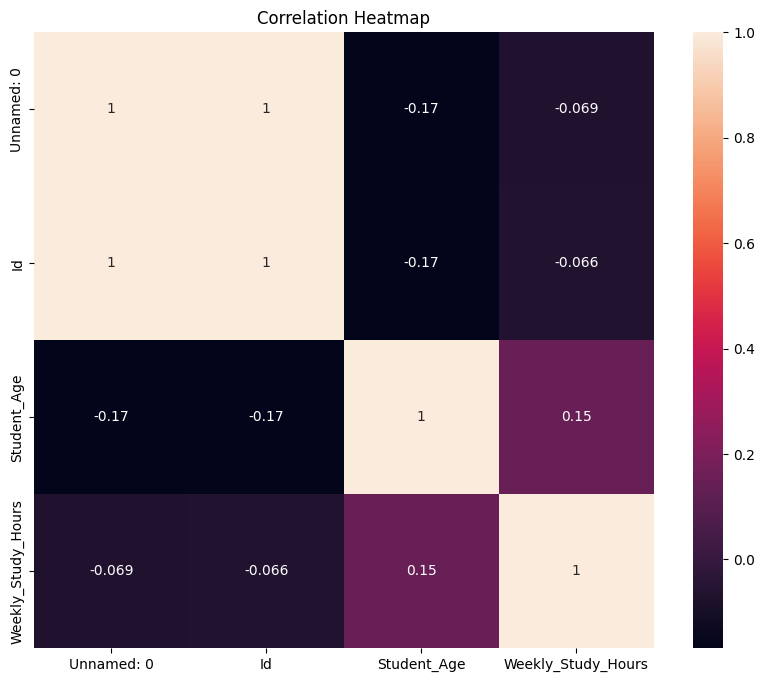

In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(10, 8))

correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()


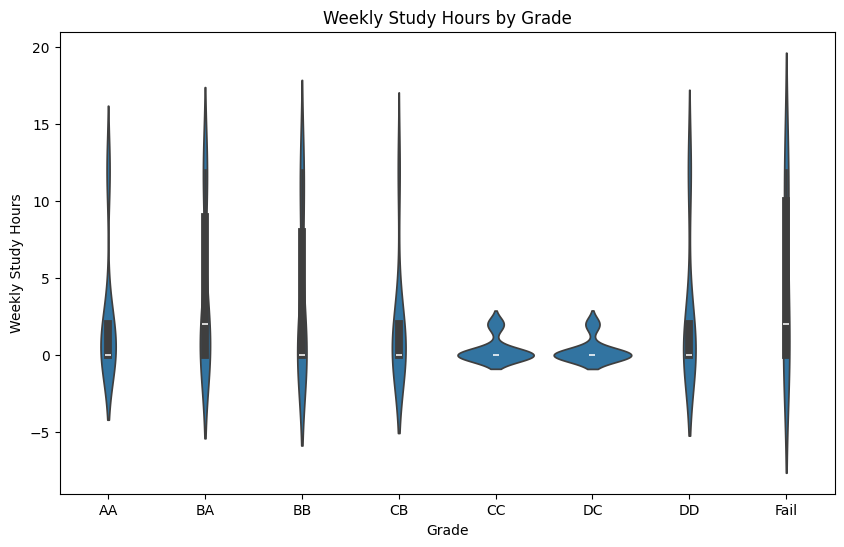

In [ ]:
# 8. Study Hours vs Grade
plt.figure(figsize=(10, 6))
sns.violinplot(x='Grade', y='Weekly_Study_Hours', data=df, order=grade_order)
plt.title('Weekly Study Hours by Grade')
plt.xlabel('Grade')
plt.ylabel('Weekly Study Hours')

plt.show()

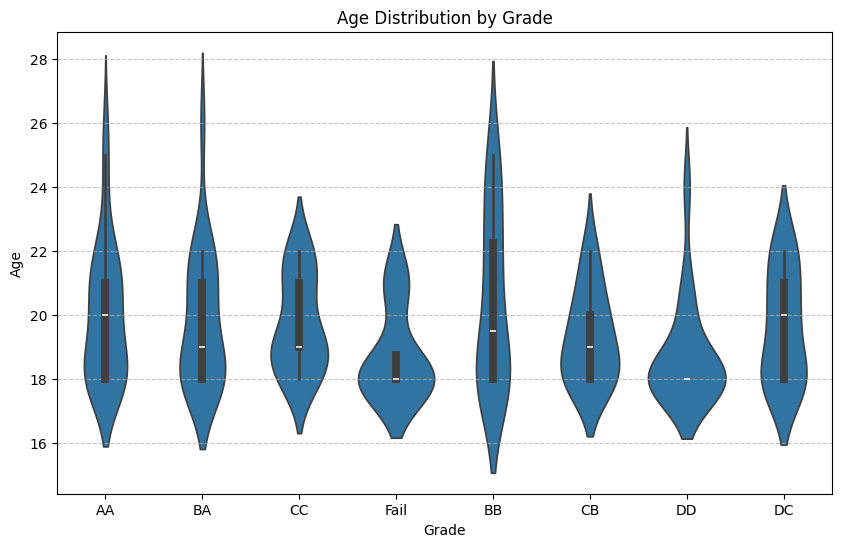

In [ ]:
#9. Age Distribution by Grade
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Grade', y='Student_Age')
plt.title('Age Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

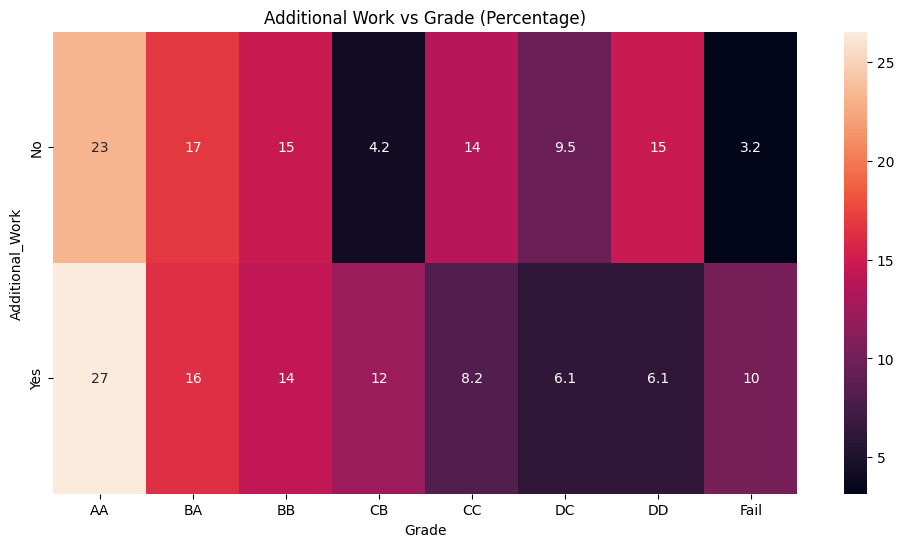

In [ ]:
#10. Additional Work vs Grade
plt.figure(figsize=(12, 6))
sns.heatmap(
    pd.crosstab(df['Additional_Work'], df['Grade'], normalize='index').reindex(columns=grade_order) * 100,
    annot=True
)
plt.title('Additional Work vs Grade (Percentage)')
plt.show()

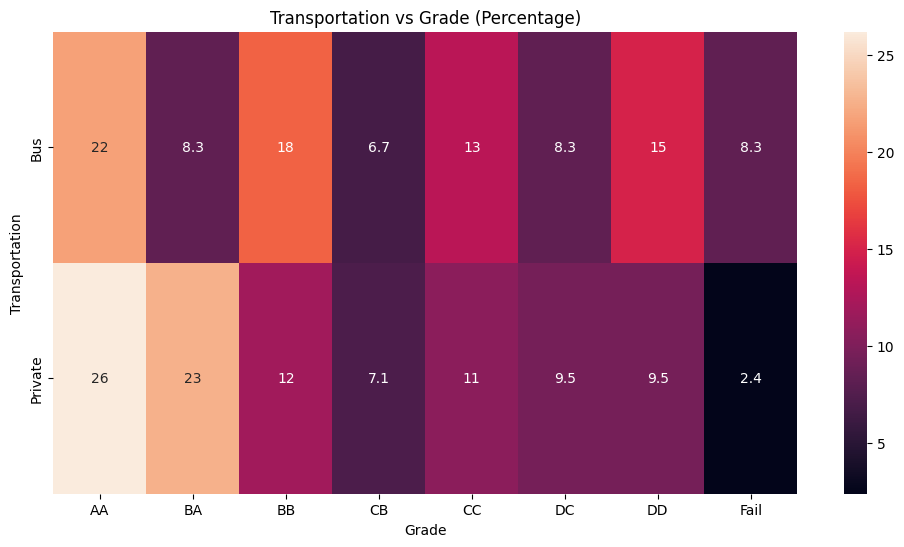

In [ ]:
#11. Transportation vs Grade
plt.figure(figsize=(12, 6))
sns.heatmap(
    pd.crosstab(df['Transportation'], df['Grade'], normalize='index').reindex(columns=grade_order) * 100,
    annot=True
)
plt.title('Transportation vs Grade (Percentage)')
plt.show()


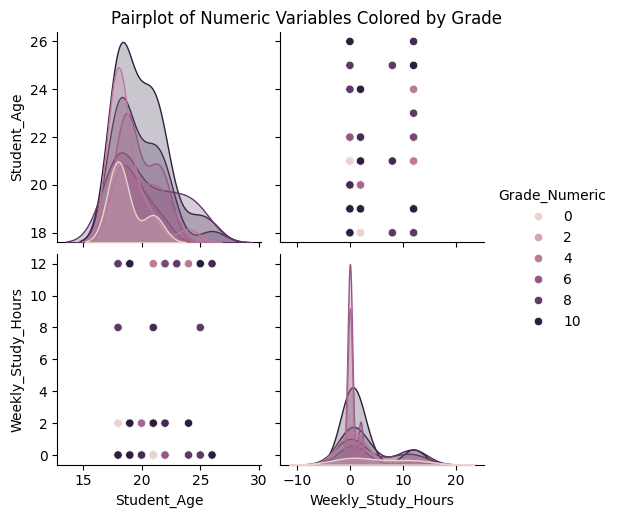

In [ ]:
#12. Pairplot of numeric variables colored by grade
grade_map = {
    'AA': 10, 'BA': 9, 'BB': 8, 'CB': 7,
    'CC': 6, 'DC': 5, 'DD': 4, 'Fail': 0
}

df['Grade_Numeric'] = df['Grade'].map(grade_map)
sns.pairplot(df[['Student_Age', 'Scholarship', 'Weekly_Study_Hours', 'Grade_Numeric']], hue='Grade_Numeric')
plt.suptitle('Pairplot of Numeric Variables Colored by Grade', y=1.02)
plt.show()


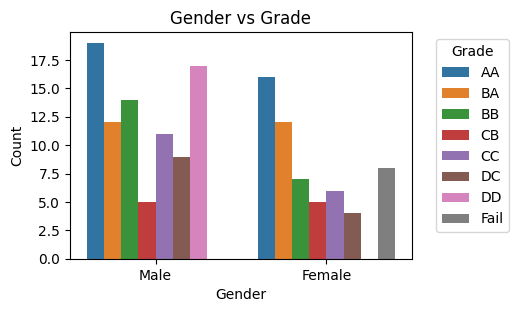

In [ ]:
#13. Interactive Dashboard
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.countplot(x='Gender', hue='Grade', data=df, order=['Male', 'Female'], hue_order=grade_order)
plt.title('Gender vs Grade')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

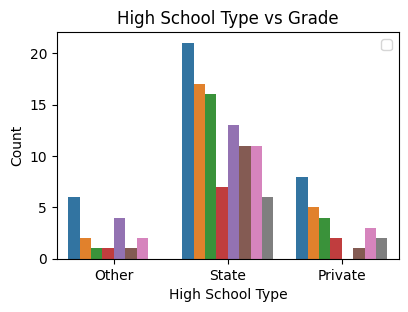

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 2)
sns.countplot(x='High_School_Type', hue='Grade', data=df, hue_order=grade_order)
plt.title('High School Type vs Grade')
plt.xlabel('High School Type')
plt.ylabel('Count')

plt.legend([])
plt.show()

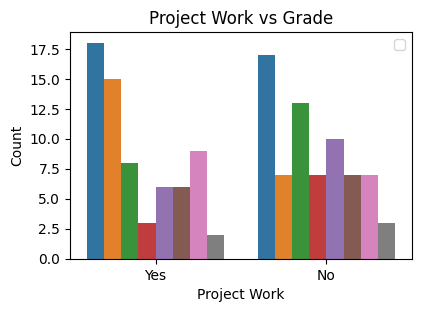

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 3)
sns.countplot(x='Project_work', hue='Grade', data=df, order=['Yes', 'No'], hue_order=grade_order)
plt.title('Project Work vs Grade')
plt.xlabel('Project Work')
plt.ylabel('Count')
plt.legend([])
plt.show()

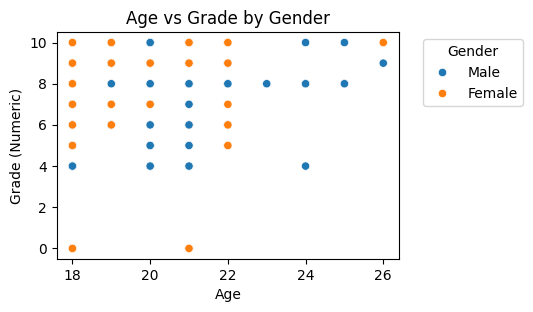

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 4)
sns.scatterplot(x='Student_Age', y='Grade_Numeric', hue='Gender', data=df)
plt.title('Age vs Grade by Gender')
plt.xlabel('Age')
plt.ylabel('Grade (Numeric)')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

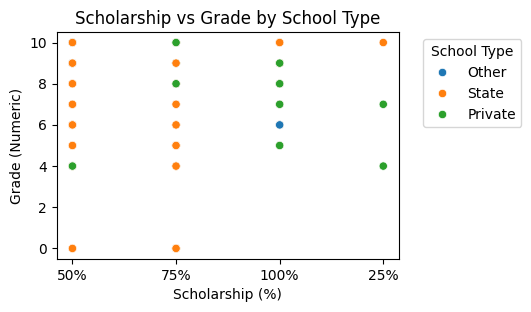

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 5)
sns.scatterplot(x='Scholarship', y='Grade_Numeric', hue='High_School_Type', data=df)
plt.title('Scholarship vs Grade by School Type')
plt.xlabel('Scholarship (%)')
plt.ylabel('Grade (Numeric)')
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

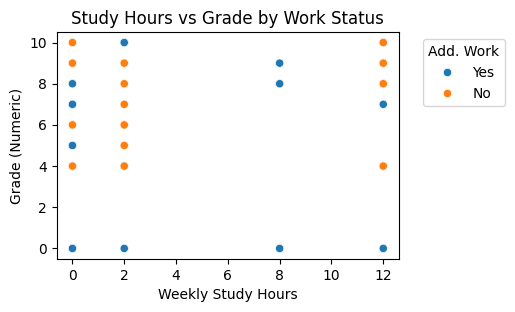

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 6)
sns.scatterplot(x='Weekly_Study_Hours', y='Grade_Numeric', hue='Additional_Work', data=df)
plt.title('Study Hours vs Grade by Work Status')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Grade (Numeric)')
plt.legend(title='Add. Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


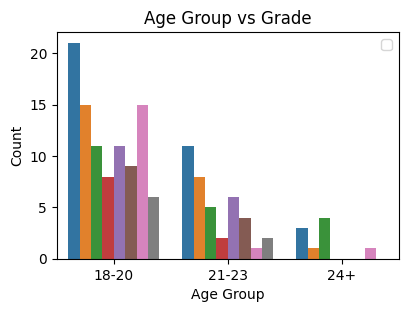

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 7)
df['Age_Group'] = pd.cut(df['Student_Age'], bins=[17, 20, 23, 30], labels=['18-20', '21-23', '24+'])
sns.countplot(x='Age_Group', hue='Grade', data=df, hue_order=grade_order)
plt.title('Age Group vs Grade')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend([])
plt.show()

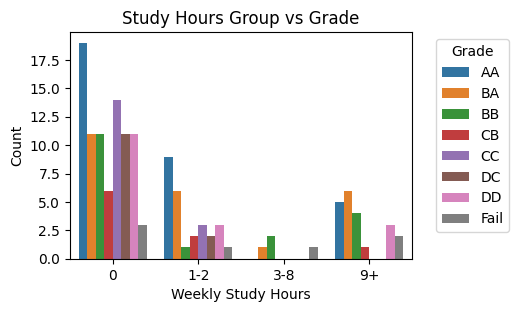

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 8)
df['Study_Group'] = pd.cut(df['Weekly_Study_Hours'], bins=[-1, 0, 2, 8, 20], labels=['0', '1-2', '3-8', '9+'])
sns.countplot(x='Study_Group', hue='Grade', data=df, hue_order=grade_order)
plt.title('Study Hours Group vs Grade')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

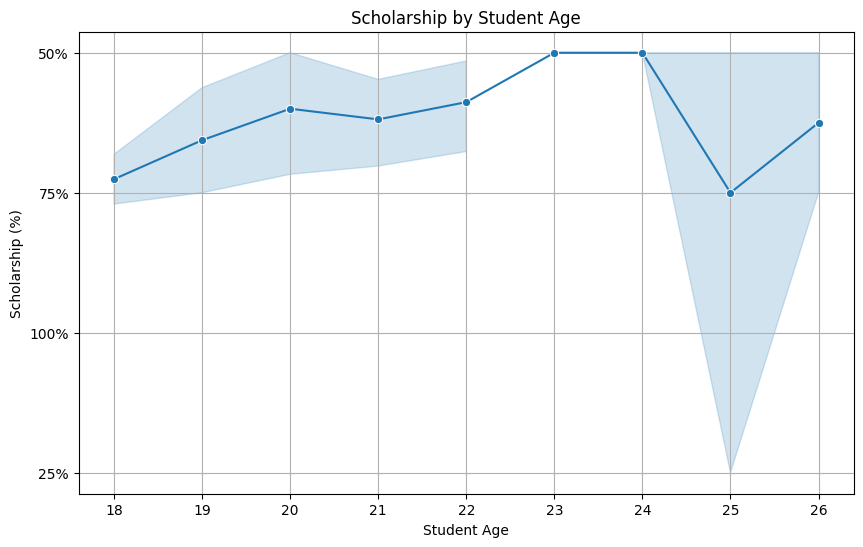

In [ ]:
#14.Line Plot – Scholarship over Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Student_Age', y='Scholarship', data=df, marker='o')
plt.title('Scholarship by Student Age')
plt.xlabel('Student Age')
plt.ylabel('Scholarship (%)')
plt.grid(True)
plt.show()


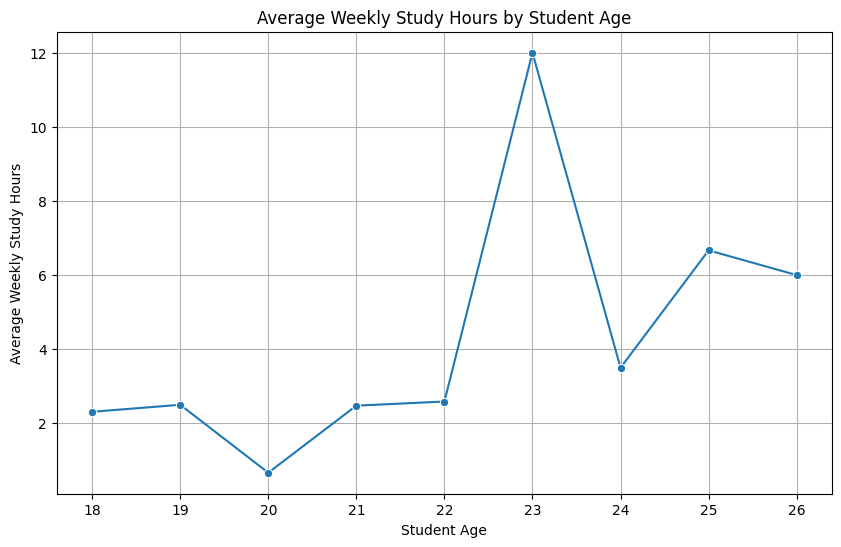

In [ ]:
#15.Line Plot-Weekly Study Hours by Student Age
plt.figure(figsize=(10, 6))
avg_study_by_age = df.groupby('Student_Age')['Weekly_Study_Hours'].mean().reset_index()
sns.lineplot(x='Student_Age', y='Weekly_Study_Hours', data=avg_study_by_age, marker='o')
plt.title('Average Weekly Study Hours by Student Age')
plt.xlabel('Student Age')
plt.ylabel('Average Weekly Study Hours')
plt.grid(True)
plt.show()

# **DATA STORYTELLING**

# **Title: Data-Driven Student Insights.**

**Introduction:**

Education is a cornerstone of societal progress, and understanding the factors that contribute to student success is crucial. This report delves into a dataset containing information about student demographics, academic habits, and performance. By employing data analysis and visualization techniques, we aim to uncover insightful narratives about the student journey, ultimately aiming to identify key drivers of academic outcomes.

**Data Exploration:**

The dataset comprises 145 rows and 10 columns. Each row represents a student, with information about their age, gender, high school type, scholarship status, work commitments, transportation, weekly study hours, involvement in projects, and ultimately, their final grade.

**Data Cleaning:**

Before diving into the analysis, we addressed missing values within the dataset. To maintain data integrity, we employed imputation strategies, replacing missing values with the median or mode for numerical and categorical variables, respectively. This ensures a complete dataset for robust analysis.

**Statistical Insights:**

Central Tendencies: We calculated the mean, median, and mode of numerical columns to gain a general understanding of student demographics and behavior. This helps establish a baseline for comparisons and further analysis.

Dispersion Measures: To understand data variability, we analyzed standard deviation, variance, and range, which unveil the spread and distribution of data points, providing crucial information about data consistency.

Summary Statistics: We explored descriptive statistics, including quartiles and percentiles, to get a holistic picture of the data distribution and identify potential outliers.

Frequency Distribution: By examining the distribution of categorical variables, such as gender, high school type, and grade, we identified potential patterns and insights into student characteristics.

**In-Depth Analysis and Storytelling:**

Analysis by Gender, High School Type, and Grade: We performed comparative analysis to see how student age, scholarship status, and study hours vary across different genders, school types, and grade levels.

Correlation Analysis: To uncover potential relationships between variables, we assessed their correlation. This reveals how strongly certain variables influence each other, providing direction for future investigations.

Interquartile Range (IQR) Analysis: We used IQR analysis to identify outliers and data points outside the normal range. Outlier detection is crucial for ensuring data integrity and reliability of results.

Data Transformation: We scaled numerical features using Min-Max scaling, standardization, and normalization techniques to bring values within a comparable range. This is essential for certain machine learning models.

Categorical Data Encoding: We converted categorical data into numerical format using label encoding and one-hot encoding, making it suitable for analysis and machine learning algorithms.

**Visualization Insights:**

Data Visualizations: Through captivating charts, such as histograms, box plots, violin plots, heatmaps, and scatter plots, we uncovered patterns, trends, and correlations in the data. Visual storytelling enables a deeper understanding of the dataset's insights.

Dashboard Creation: We developed an interactive dashboard that provides a comprehensive overview of the insights derived from the analysis, facilitating exploration and communication of findings.

Key Findings:

Impact of Age and Study Hours on Grades: There appears to be a relationship between student age and study hours with their grades. Younger students with more study hours seem to perform better.

Scholarship and School Type: The data shows potential links between the scholarship percentage, high school type, and student performance. These connections warrant further investigation.

Correlation Patterns: Several variables, including weekly study hours, scholarships, and student age, exhibit correlations with grades, suggesting their potential importance in student success.

Frequency Distributions: The distribution of grades reveals interesting patterns, suggesting the impact of various factors on overall student performance.

Conclusions:
By analyzing the dataset, we gained valuable insights into the factors that impact student performance. Further studies and data exploration can deepen our understanding and inform data-driven strategies for educational improvement.

**Recommendations:**

Interventions for Specific Student Groups: Based on the findings, targeted programs can be developed to support specific student groups, such as students from certain high school types or those with lower study hours.
Improving Data Collection: Collecting more data on student background, learning preferences, and socioeconomic factors could help strengthen predictive models and identify additional avenues for intervention.
Personalized Learning Approaches: Tailoring instruction and support based on individual student needs can contribute to more successful outcomes.

**Future Work:**

Implementing predictive models for student performance.
Exploring the impact of socioeconomic factors and extracurricular activities on academic outcomes.
Examining the relationship between teacher performance and student success.
This report provides a glimpse into the insights derived from the student dataset. Continued analysis and data-driven decision-making can pave the way for improved educational practices and increased student success.